# Titanic

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Importing the DATASET

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

## Checking Top 5 rows Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA


# Total Numbers of Rows and Column

In [4]:
train.shape

(891, 12)

# All Column Names

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Checking Data Type of Data

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Checking for Null Values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Information about Data (Memory Used and Data Types)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning and preprocessing

Since there are Null values in the dataset, so we need to treat them.

# Handling Null Values

Droping "cabin" column from dataset because most of the values (687) are missing and we can not take mean, mode etc of it. So, we will drop this column

In [9]:
train=train.drop(columns="Cabin", axis=1)

Filling Null Values of "Age" column in dataset by mean value

In [10]:
train["Age"].fillna(train["Age"].mean(), inplace=True)

Filling Null Values of "Embarked" column in dataset by mode value

In [11]:
#checking all values of "Embarked" column
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
#checking repeated values in "Embarked" column through mode
print(train["Embarked"].mode())

0    S
dtype: object


Filling Null Values of "Embarked" column in dataset by mode value

In [13]:
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

#### Again Checking for Null Values after Handling it

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Descriptive Statistics

In [16]:
# Describing Data : works only on continuous column and do not work on categorical column
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking Description through heatmap also.

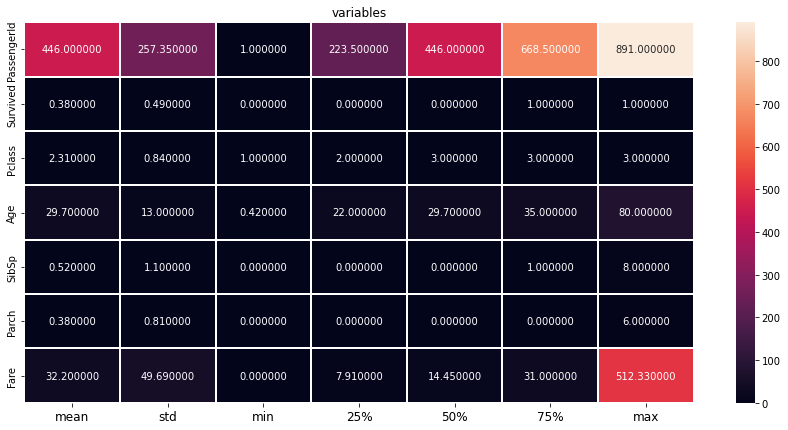

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

# Outcome of Describe of Datasets:

We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column. The summary of this dataset looks good as there are no negative/ invalid value present.

Total No of Rows: 891 Total No. of Columns: 7

1.PassengerId:

  Mean= 446.000000, std= 257.353842, Min= 1.000000, Max= 891.000000

2.Survived:

  Mean= 0.383838, std= 0.486592, Min= 0.000000, Max= 1.000000

3.Pclass:

   Mean= 2.308642, std= 0.836071, Min= 1.000000, Max= 3.000000

4.Age:

   Mean= 29.699118, std= 13.002015, Min= 0.420000, Max= 80.000000

Minimum Age is 0.42 which means approx 4months and Maximum Age is 80. Mean of age is 29

1.SibSp:

   Mean= 0.523008, std= 1.102743, Min= 0.000000, Max= 8.000000

2.Parch:

   Mean= 0.381594, std= 0.806057, Min= 0.000000, Max= 6.000000

3.Fare:

   Mean= 32.204208, std= 49.693429, Min= 0.000000, Max= 512.329200

Minimum Fare is 0 which means travelling in free and Maximum Fare is 512. Mean of age is 29

Some columns : Name, Sex, Ticket, Cabin and Embarked are not included in the Describe Method as these are categorical column and Describe Method works only on continuous column

We observe that the dataset seems to be having more outliers as well as skewness in the data. The column Age and Fare has huge outliers from the max of 80 and 512 respectively which is quite far from their mean with their second quantile median(50%).

# Data Visualization

#### Using Countplot for categorical columns

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

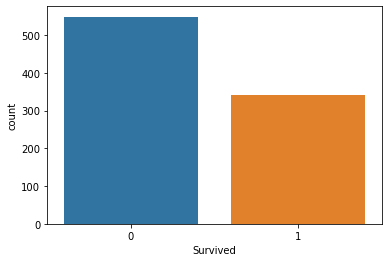

In [18]:
#Count Plot for "Survived" column
print(train["Survived"].value_counts())

sns.countplot("Survived",data=train)

Not Survived People are more than Survived People.

Here 0= not survived and 1= survived

Total no of Survived= 342 and not survived= 549

['male' 'female']
male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

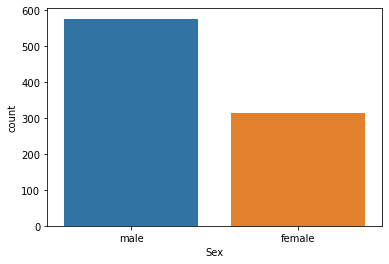

In [19]:
#Count Plot for "Sex" column
print(train["Sex"].unique())
print(train["Sex"].value_counts())

sns.countplot("Sex",data=train)

Total Number of Male present is more than Total Number of Female present in Titanic Train

<AxesSubplot:xlabel='Sex', ylabel='count'>

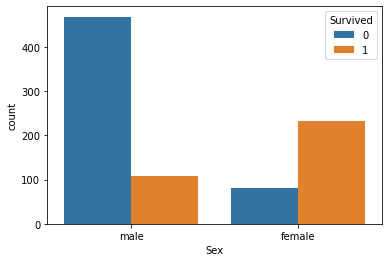

In [20]:
#Count Plot for Survived Male and Survived Female

sns.countplot("Sex", hue="Survived", data=train)

Total Number of Survived Female is more than Total Number of Survived Male

[3 1 2] 

Total no of people in All Pclass are: 

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

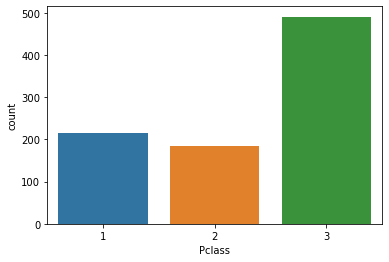

In [21]:
#Count Plot of "Pclass" Column
print((train["Pclass"].unique()),"\n")
print("Total no of people in All Pclass are:","\n")
print(train["Pclass"].value_counts())

sns.countplot("Pclass",  data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

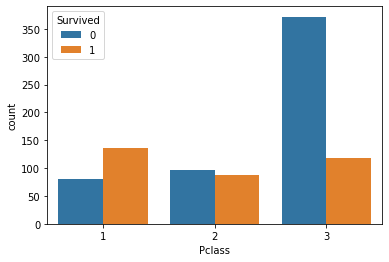

In [22]:
#Count Plot for Survived people in "Pclass"  column
sns.countplot("Pclass", hue="Survived", data=train)

['S' 'C' 'Q'] 

Total no: 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

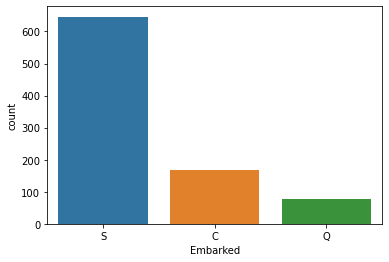

In [23]:
#Count Plot of "Pclass" Column
print((train["Embarked"].unique()),"\n")
print("Total no:","\n")
print(train["Embarked"].value_counts())

sns.countplot("Embarked",  data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

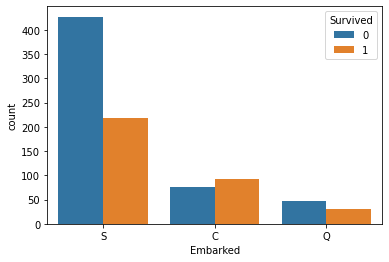

In [24]:
#Count Plot for Survived people in "Embarked" column
sns.countplot("Embarked", hue="Survived", data=train)

[0 1 2 5 3 4 6] 

Total no: 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

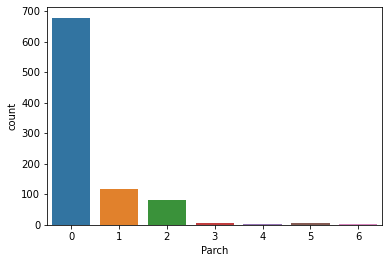

In [25]:
#Count Plot of "Pclass" Column
print((train["Parch"].unique()),"\n")
print("Total no:","\n")
print(train["Parch"].value_counts())

sns.countplot("Parch",  data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

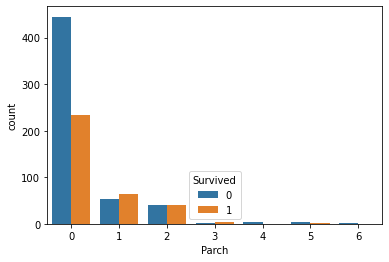

In [26]:
#Count Plot for Survived people in "Embarked" column
sns.countplot("Parch", hue="Survived", data=train)

<Figure size 1080x720 with 0 Axes>

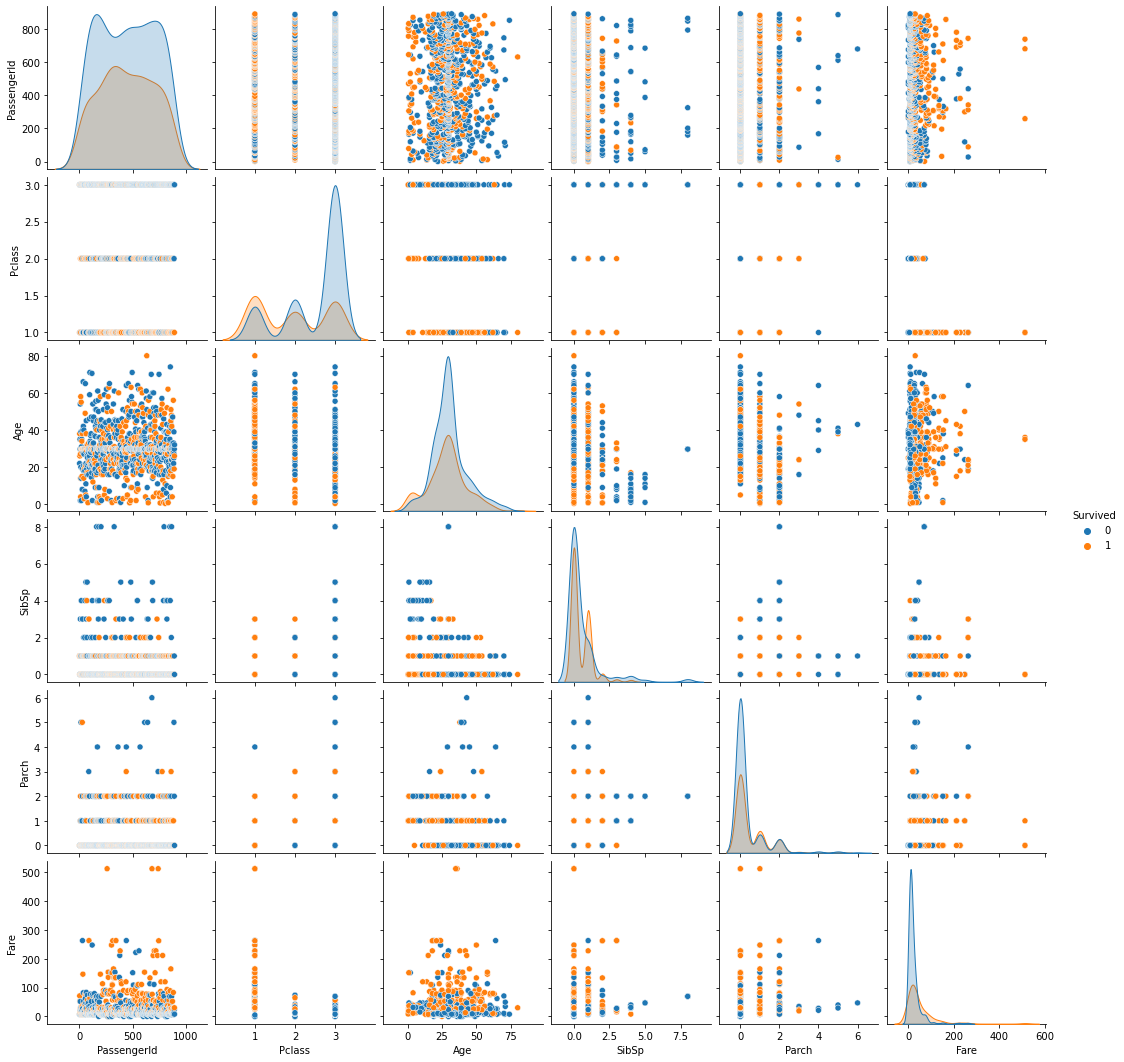

In [27]:
plt.figure(figsize=(15,10))
sns.pairplot(data=train,hue="Survived")

This pair plot gives the relation between the columns which are plotted on the basis of target variable 'Survived'.

## Normal Distribution Curve:

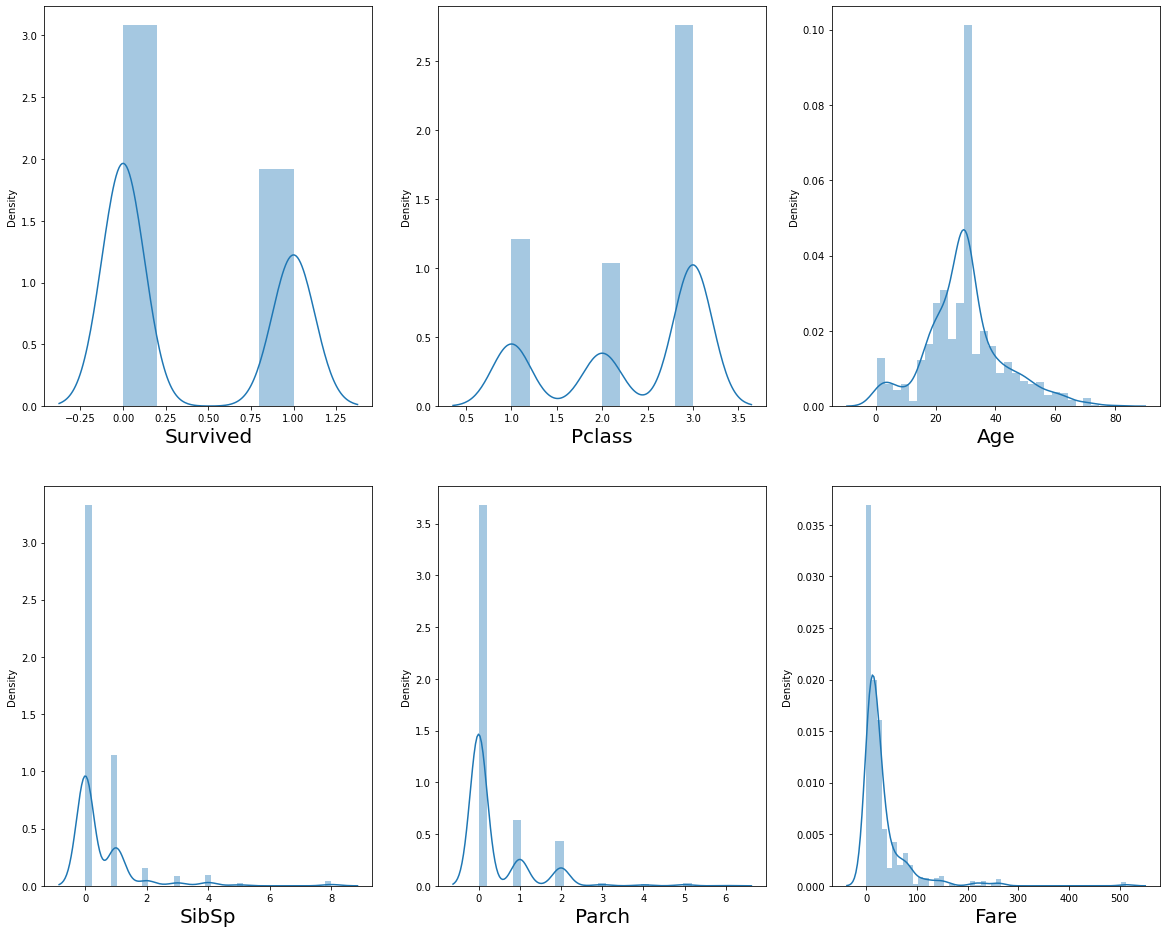

In [28]:
collist=[ 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',  'Fare',]
plt.figure(figsize=(20,25))
plotnumber = 1

for column in train[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking Correlation

In [29]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


This gives the correlation between the denpendent and independent variables.

In [30]:
train.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

## Checking Correlation with heatmap

<AxesSubplot:>

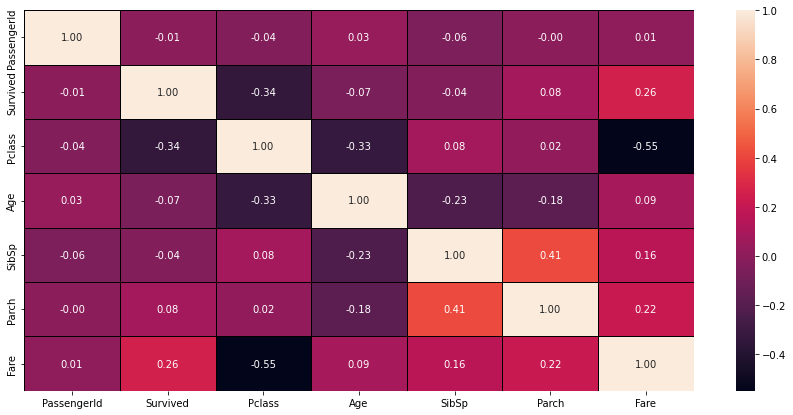

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

## Outcome of 

1.PassengerId has 1% correlation with the target column which can be considered as positively correlated

2.Pclass has -55% correlation with the target column which can be considered as highly negatively correlated

3.Age has 9% correlation with the target column which can be considered as positively correlated

4.SibSp has 16% correlation with the target column which can be considered as positively correlated

5.Parch has 22% correlation with the target column which can be considered as positively correlated

6.Fare has 100% correlation with the target column which can be considered as positively correlated

SibSp and Parch are positively correlated with each other

Max Correlation: Fare

Min Correlation: Pclass

### Checking correlation with barplot

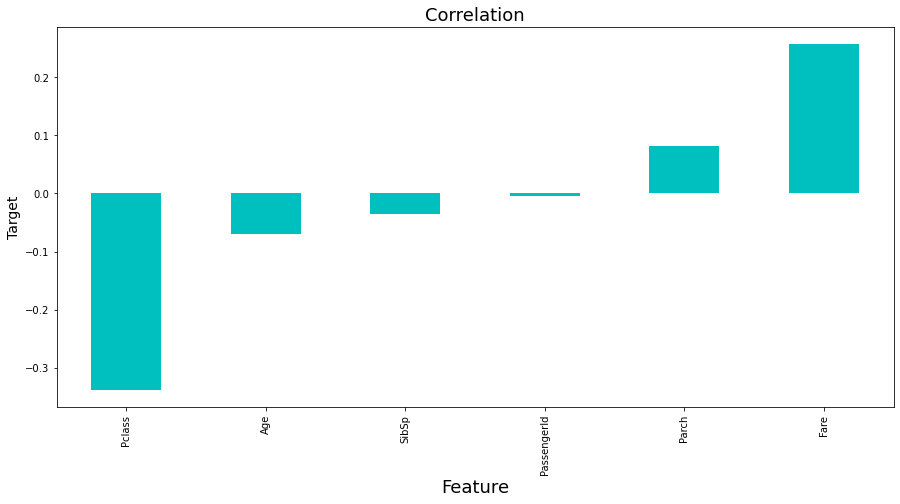

In [32]:
plt.figure(figsize=(15,7))
train.corr()['Survived'].sort_values(ascending=True).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

## Observation of the correlation:

1.Positively correlated with : Parch and Fare

2.Negatively correlated with : Pclass, Age, SibSp and PassengerId

    In heatmap we also observed that the PassengerId column has no relation with the target variable, so we can drop that column.

## Dropping PassengerId column

In [33]:
train=train.drop(columns="PassengerId", axis=1)

In [34]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [36]:
#checking Original Data
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [37]:
#Coverting "Sex" column data which contains categorical data into continuous data.
train['Sex']=encoder.fit_transform(train['Sex'])
train["Sex"].unique()

array([1, 0])

Male denoted as 1 and Female denoted as 0

In [38]:
#checking Original Data
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [39]:
#Coverting "Embarked" column data which contains categorical data into continuous data.
train['Embarked']=encoder.fit_transform(train['Embarked'])
train["Embarked"].unique()

array([2, 0, 1])

S denoted as 2, C denoted as 0 and Q denoted as 1

In [40]:
#Coverting "Ticket" column data which contains categorical data into continuous data.
train['Ticket']=encoder.fit_transform(train['Ticket'])
train["Ticket"].unique()

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
        95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
       507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
       239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
       553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
       304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
       428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
       254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
       463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
       203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
       573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
         5, 659,  90, 412, 488, 593, 169, 574, 629, 114, 271,  34, 459,
        11, 435, 386, 122, 227, 406, 604, 452, 494, 461, 160, 30

### Checking after encoding

In [41]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2


### Dropping Name column as it is irrelevant

In [42]:
train=train.drop(columns="Name", axis=1)

### Checking columns after dropping

In [43]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [44]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


# Checking Outliers

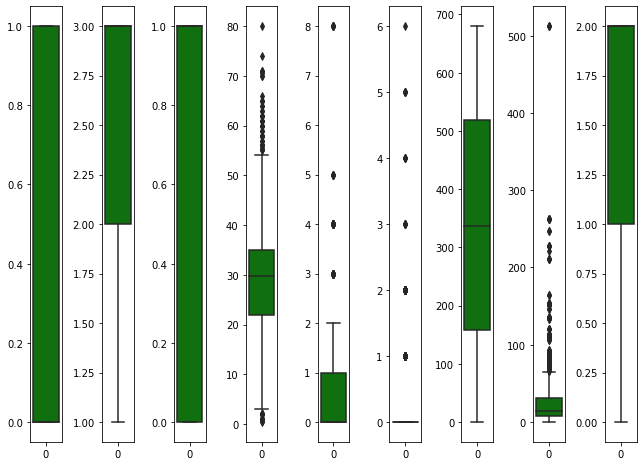

In [45]:
collist=train.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=train[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:

Outliers present in columns: Age, SibSp, Parch and Fare

Outliers not present in columns: Survived, Pclass, Sex, Ticket and Embarked

# Removing Outliers
### 1. Zscore method using Scipy

In [46]:
from scipy.stats import zscore

In [47]:
#  Outliers will be removed only from Continuous column variable i.e; Age and Fare. 
#We will not remove outliers from Categorical column i.e; SibSp, Parch

variables = train[['Age','Fare']]

z=np.abs(zscore(variables))

# Creating new dataframe
titanic_train = train[(z<3).all(axis=1)]
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


In [48]:
z.head()

,Age,Fare
0,0.592481,0.502445
1,0.638789,0.786845
2,0.284663,0.488854
3,0.407926,0.420730
4,0.407926,0.486337


In [49]:
len(np.where(z>3)[0])

27

In [50]:
print("Old DataFrame data in Rows and Column:",train.shape)
print("New DataFrame data in Rows and Column:",titanic_train.shape)
print("Total Dropped rows:",train.shape[0]-titanic_train.shape[0])

Old DataFrame data in Rows and Column: (891, 9)
New DataFrame data in Rows and Column: (864, 9)
Total Dropped rows: 27


### Percentage Data Loss using Zscore

In [51]:
loss_percent=(891-864)/891*100
print(loss_percent,"%")

3.0303030303030303 %


## 2. IQR (Inter Quantile Range) method

In [52]:
#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
train_new=train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
print("Old DataFrame data in Rows and Column:",train.shape)
print("\nNew DataFrame data in Rows and Column:",train_new.shape)
print("\nTotal Dropped rows:",train.shape[0]-train_new.shape[0])

Old DataFrame data in Rows and Column: (891, 9)

New DataFrame data in Rows and Column: (721, 9)

Total Dropped rows: 170


## Percentage Data Loss using IQR

In [54]:
loss_perc = (891-721)/891*100
loss_perc

19.07968574635241

We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

## Checking for the skewness

In [55]:
titanic_train.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        2.257178
Embarked   -1.328443
dtype: float64

## Observation:

Skewness threshold taken is +/-0.65. Columns which are having skewness: Sex, SibSp, Parch, Fare, Embarked

The Fare column data is highly skewed

All the columns are not normallly distributed

Since Embarked and Sex is categorical column so we will not remove skewness from them. Only we will remove skewness from Sex, Parch and Fare as these column contains continuous data.

#### Data visualization of skewed continuous column using distplot

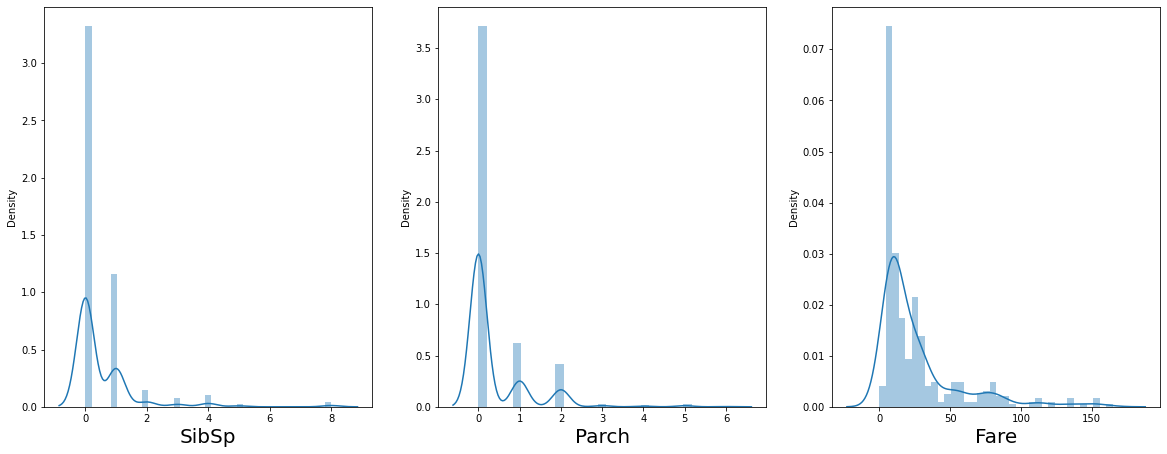

In [56]:
collist=["SibSp", "Parch", "Fare"]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(titanic_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Removing skewness using yeo-johnson method

In [57]:
from sklearn.preprocessing  import power_transform

In [58]:
collist=["SibSp", "Parch", "Fare"]
titanic_train[collist]=power_transform(titanic_train[collist],method='yeo-johnson')
titanic_train[collist]

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493
...,...,...,...
886,-0.680931,-0.548637,-0.279691
887,-0.680931,-0.548637,0.607981
888,1.374574,1.879004,0.345275
889,-0.680931,-0.548637,0.607981


### checking skewness after removal

In [59]:
titanic_train.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       0.805038
Parch       1.277888
Ticket      0.012485
Fare       -0.009095
Embarked   -1.328443
dtype: float64

### checking skewness after removal through data visualization using distplot

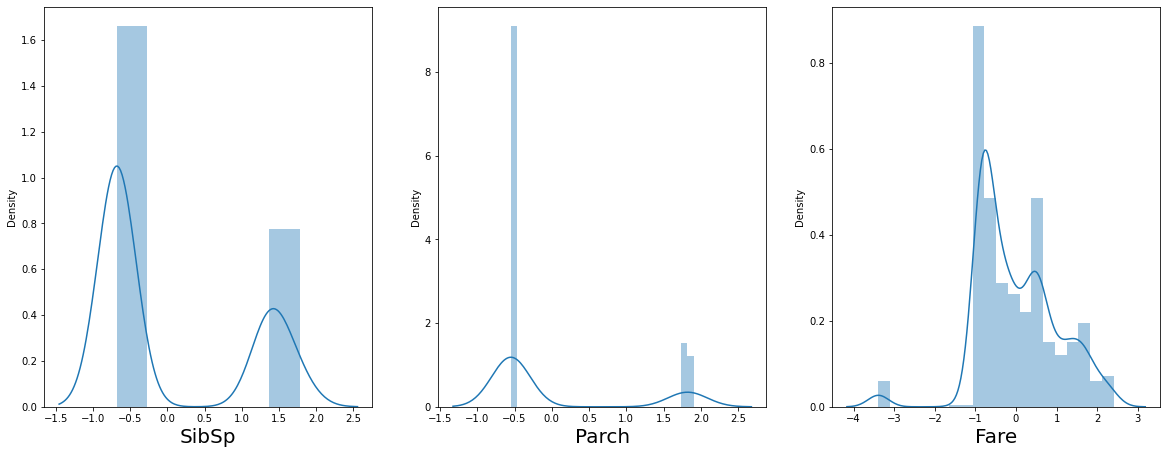

In [60]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(titanic_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

# Data preprocessing

### Spliting data into Target and Features:

In [61]:
x=titanic_train.drop("Survived",axis=1)
y=titanic_train["Survived"]

In [62]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1.374574,-0.548637,523,-0.882769,2
1,1,0,38.0,1.374574,-0.548637,596,1.529038,0
2,3,0,26.0,-0.680931,-0.548637,669,-0.792444,2
3,1,0,35.0,1.374574,-0.548637,49,1.216581,2
4,3,1,35.0,-0.680931,-0.548637,472,-0.776493,2


In [63]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [64]:
x.shape

(864, 8)

In [65]:
y.shape

(864,)

In [66]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [67]:
!pip install imblearn

In [68]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [69]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

# Scaling data using Min-Max Scaler

In [70]:
x.shape, y.shape

((1074, 8), (1074,))

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [73]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.769118,0.432617,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.876471,0.848336,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.983824,0.448186,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.072059,0.794478,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.694118,0.450936,1.0


By using min max scaler we can see that the values are between 0 and 1 and thus it is our scaled data.

# Creating Model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

Finding the best random state among all the models

In [75]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8637770897832817  on Random_state  100


# Creating train-test-split

In [76]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [77]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((751, 8), (751,), (323, 8), (323,))

In [78]:
x.shape, y.shape

((1074, 8), (1074,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. As it is a continuous data , so we have to understand this by Classification problem


# Logistic Regression

In [79]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test,pred_lr))

0.8080495356037152
[[136  35]
 [ 27 125]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       171
           1       0.78      0.82      0.80       152

    accuracy                           0.81       323
   macro avg       0.81      0.81      0.81       323
weighted avg       0.81      0.81      0.81       323



# Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

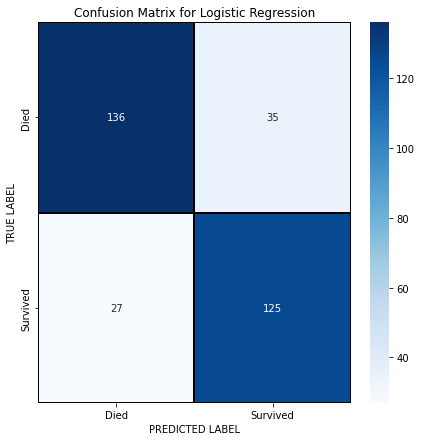

In [80]:
cm = confusion_matrix(y_test,pred_lr)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

# Classification Algorithms

# 1. Decision Tree Classifier

In [81]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8452012383900929
[[138  33]
 [ 17 135]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       171
           1       0.80      0.89      0.84       152

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here we are getting 85% accuracy using Decision Tree Classifier.


# Confusion Matrix for DTC

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

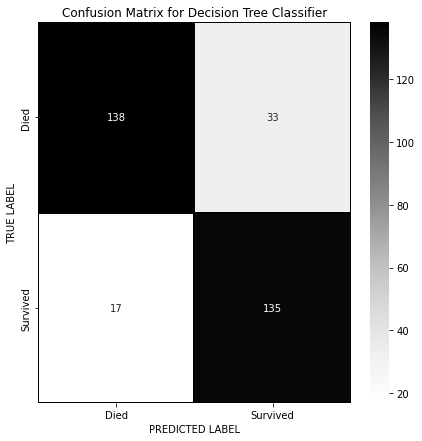

In [82]:
cm = confusion_matrix(y_test,pred_dtc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greys", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# 2. Random Forest Classifier

In [83]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test,pred_rfc))

0.8544891640866873
[[144  27]
 [ 20 132]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       171
           1       0.83      0.87      0.85       152

    accuracy                           0.85       323
   macro avg       0.85      0.86      0.85       323
weighted avg       0.86      0.85      0.85       323



Here we are getting 87% accuracy using Random Forest Classifier.

# Confusion Matrix for Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

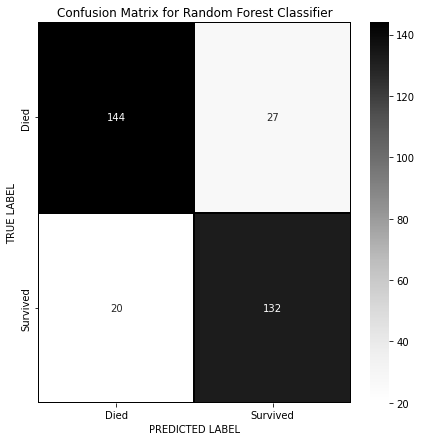

In [84]:
cm = confusion_matrix(y_test,pred_rfc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greys", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

# 3. Support Vector Machine Classifier

In [85]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test,pred_svc))

0.8142414860681114
[[140  31]
 [ 29 123]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       171
           1       0.80      0.81      0.80       152

    accuracy                           0.81       323
   macro avg       0.81      0.81      0.81       323
weighted avg       0.81      0.81      0.81       323



# Confusion Matrix for SVC

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine CLassifier')

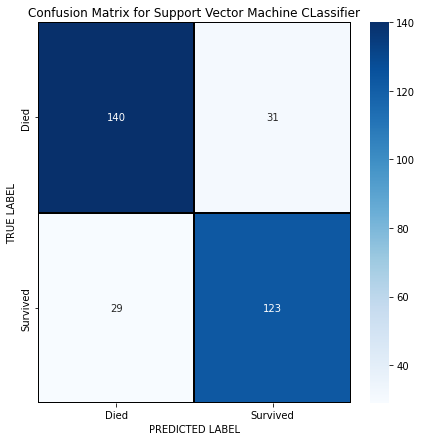

In [86]:
cm = confusion_matrix(y_test,pred_svc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine CLassifier')

# 4. KNN Classifier

In [87]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test,pred_knn))

0.8235294117647058
[[144  27]
 [ 30 122]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       171
           1       0.82      0.80      0.81       152

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



Here we are getting 84% accuracy using KNN Classifier.


# Confusion Matrix for KNN classifier

Text(0.5, 1.0, 'Confusion Matrix for  KNN classifier')

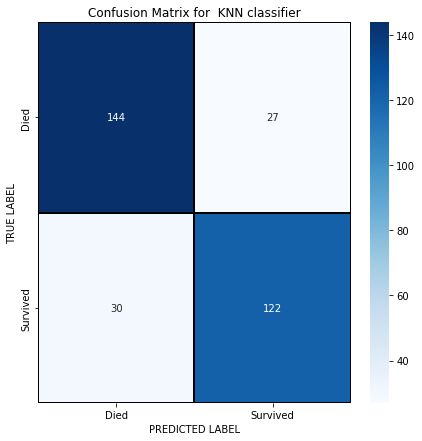

In [88]:
cm = confusion_matrix(y_test,pred_knn)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNN classifier')

# 5. Gradient Boosting Classifier

In [89]:
gb = GradientBoostingClassifier(n_estimators =300,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print(accuracy_score(y_test, pred_gb))
print(confusion_matrix(y_test, pred_gb))
print(classification_report(y_test,pred_gb))

0.8513931888544891
[[145  26]
 [ 22 130]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       171
           1       0.83      0.86      0.84       152

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here we are getting 89% accuracy using Gradient Boosting Classifier.

# Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Confusion Matrix for  Gradient Boosting classifier')

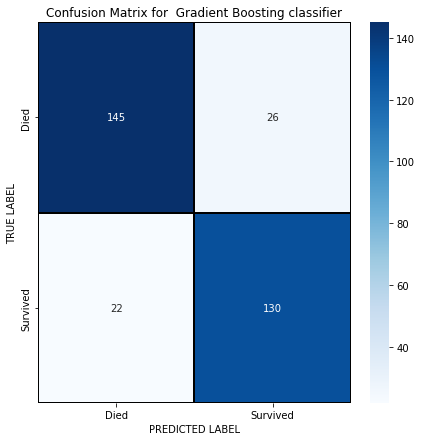

In [90]:
cm = confusion_matrix(y_test,pred_gb)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Gradient Boosting classifier')

# Cross Validation Score for all the model

In [91]:
from sklearn.model_selection import cross_val_score

CV Score for Logistic Regression

In [92]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=9).mean())

CV score for Logistic Regression:  0.80922035480859


#### CV Score for Random Forest Classifier

In [93]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=9).mean())

CV score for Random forest Classifier:  0.8539915966386554


#### CV Score for Support Vector Classifier

In [94]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=9).mean())

CV score for Support Vector  Classifier:  0.80922035480859


#### CV Score for KNN Classifier

In [95]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=9).mean())

CV score for KNN Classifier:  0.8269530034235917


#### CV Score for Gradient Boosting Classifier

In [96]:

print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=9).mean())

CV score for Gradient Boosting Classifier:  0.8502567693744164


In [97]:
score= pd.DataFrame({'CV_GB':0.891640866873065, 'accuracy_score_GB':0.8623949579831933}, index=['0'])
score

,CV_GB,accuracy_score_GB
0,0.891641,0.862395


From the observation of accuracy and cross validation score and their difference we can predict that Gradient Boosting Classifier is the best model.

# Hyper parameter tuning for best model using GridsearchCV

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [99]:
gb=GradientBoostingClassifier(random_state=42)

In [105]:
# Creating Parameter List to pass in Grid SearchCV

parameters = {'max_features': ['auto','sqrt','log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini','entropy']}

In [106]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

In [107]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8637770897832817

Here the final model gives 88% accuracy after tuning.

# ROC-AUC Curve

In [108]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

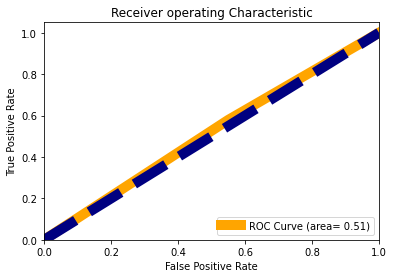

In [109]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.88.

# Saving the Model

In [110]:
import pickle
filename='Titanic_Train_Project.pickle'
pickle.dump(CV_GB,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

## Checking predicted and original values

In [111]:
a =np.array(y_test)
predicted=np.array(CV_GB.predict(x_test))
Train=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Train

,Orginal,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
318,1,1
319,1,1
320,1,1
321,0,1


## As we can see, predicted and original values matches approx 100%.

In [112]:
model =titanic_train.to_csv('Titanic_Train.csv')
model